In [1]:
print ("hellO")

hellO


# IMPORTING DATA

In [5]:
import pandas as pd
df = pd.read_csv('D:/mt/bus_running_times_654.csv', on_bad_lines='warn')
print("dfset Shape:", df.shape)
print("\nColumns:", df.columns.tolist())

dfset Shape: (203128, 9)

Columns: ['trip_id', 'deviceid', 'direction', 'segment', 'date', 'start_time', 'end_time', 'run_time_in_seconds', 'length']


In [6]:
df.head(10)

,trip_id,deviceid,direction,segment,date,start_time,end_time,run_time_in_seconds,length
0,1.0,262.0,1.0,1.0,2021-10-01,06:39:49,06:40:58,69.0,0.6261
1,1.0,262.0,1.0,2.0,2021-10-01,06:42:12,06:45:42,210.0,1.2808
2,1.0,262.0,1.0,3.0,2021-10-01,06:45:42,06:53:58,496.0,2.1125
3,1.0,262.0,1.0,4.0,2021-10-01,06:54:04,06:57:19,195.0,1.5513
4,1.0,262.0,1.0,5.0,2021-10-01,06:57:19,06:58:56,97.0,0.8450
5,1.0,262.0,1.0,6.0,2021-10-01,07:02:27,07:05:57,210.0,1.3125
6,1.0,262.0,1.0,7.0,2021-10-01,07:06:32,07:07:17,45.0,0.3713
7,1.0,262.0,1.0,8.0,2021-10-01,07:07:42,07:09:21,99.0,0.6245
8,1.0,262.0,1.0,9.0,2021-10-01,07:09:44,07:10:18,34.0,0.2572
9,1.0,262.0,1.0,10.0,2021-10-01,07:11:02,07:13:31,149.0,1.2349


In [7]:
print(df.isnull().sum())

trip_id                  64
deviceid                 64
direction                64
segment                  64
date                   2449
start_time             2449
end_time               2449
run_time_in_seconds    2449
length                   64
dtype: int64


# Correct Data Handling


In [8]:
import pandas as pd

# 2. Заполнение числовых пропусков медианой
numeric_cols = ['trip_id', 'deviceid', 'direction', 'segment', 'run_time_in_seconds', 'length']
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# 3. Заполнение `date` на основе `trip_id`
df['date'] = df.groupby('trip_id')['date'].transform(lambda x: x.fillna(method='ffill'))

# 4. Заполнение `start_time`, `end_time` на основе предыдущих значений
df['start_time'] = df['start_time'].fillna(method='ffill')
df['end_time'] = df['end_time'].fillna(method='ffill')

# Проверка на оставшиеся пропуски
print(df.isnull().sum())


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_17748\486576202.py:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['date'] = df.groupby('trip_id')['date'].transform(lambda x: x.fillna(method='ffill'))
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_17748\486576202.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['date'] = df.groupby('trip_id')['date'].transform(lambda x: x.fillna(method='ffill'))


trip_id                  0
deviceid                 0
direction                0
segment                  0
date                   261
start_time               0
end_time                 0
run_time_in_seconds      0
length                   0
dtype: int64


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_17748\486576202.py:11: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['start_time'] = df['start_time'].fillna(method='ffill')
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_17748\486576202.py:12: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['end_time'] = df['end_time'].fillna(method='ffill')


In [9]:
    import pandas as pd

# Удаление строк с пропущенными значениями (если нужно)
# df = df.dropna()

# Заполнение числовых колонок медианой
numeric_cols = ['trip_id', 'deviceid', 'direction', 'segment', 'run_time_in_seconds', 'length']
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Заполнение `date` на основе `trip_id`
df['date'] = df.groupby('trip_id')['date'].transform(lambda x: x.fillna(method='ffill'))

# Заполнение `start_time`, `end_time`
df['start_time'] = df['start_time'].fillna(method='ffill')
df['end_time'] = df['end_time'].fillna(method='ffill')

# Проверка пропусков
print(df.isnull().sum())


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_17748\2221904288.py:11: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['date'] = df.groupby('trip_id')['date'].transform(lambda x: x.fillna(method='ffill'))
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_17748\2221904288.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['date'] = df.groupby('trip_id')['date'].transform(lambda x: x.fillna(method='ffill'))


trip_id                  0
deviceid                 0
direction                0
segment                  0
date                   261
start_time               0
end_time                 0
run_time_in_seconds      0
length                   0
dtype: int64


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_17748\2221904288.py:14: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['start_time'] = df['start_time'].fillna(method='ffill')
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_17748\2221904288.py:15: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['end_time'] = df['end_time'].fillna(method='ffill')


In [10]:
# Заполнение `date` на основе `trip_id`
df['date'] = df.groupby('trip_id')['date'].transform(lambda x: x.ffill())

# Проверка пропусков
print(df.isnull().sum())


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_17748\2936256332.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['date'] = df.groupby('trip_id')['date'].transform(lambda x: x.ffill())


trip_id                  0
deviceid                 0
direction                0
segment                  0
date                   261
start_time               0
end_time                 0
run_time_in_seconds      0
length                   0
dtype: int64


In [11]:
df = df.dropna(subset=['date'])

# Проверка пропусков после удаления
print(df.isnull().sum())


trip_id                0
deviceid               0
direction              0
segment                0
date                   0
start_time             0
end_time               0
run_time_in_seconds    0
length                 0
dtype: int64


In [12]:
# Проверка типов данных
print(df.dtypes)

# Преобразуем `date` в формат даты
df['date'] = pd.to_datetime(df['date'])

# Преобразуем `start_time` и `end_time` в формат времени
df['start_time'] = pd.to_datetime(df['start_time'], format='%H:%M:%S').dt.time
df['end_time'] = pd.to_datetime(df['end_time'], format='%H:%M:%S').dt.time


trip_id                float64
deviceid               float64
direction              float64
segment                float64
date                    object
start_time              object
end_time                object
run_time_in_seconds    float64
length                 float64
dtype: object


In [13]:
# Проверяем количество дубликатов
print(f"Дубликатов: {df.duplicated().sum()}")

# Удаляем дубликаты
df = df.drop_duplicates()


Дубликатов: 1


In [14]:
# Проверяем отрицательные или нулевые значения в `run_time_in_seconds` и `length`
print(df[df['run_time_in_seconds'] <= 0])
print(df[df['length'] <= 0])

# Фильтруем некорректные значения
df = df[(df['run_time_in_seconds'] > 0) & (df['length'] > 0)]


Empty DataFrame
Columns: [trip_id, deviceid, direction, segment, date, start_time, end_time, run_time_in_seconds, length]
Index: []
Empty DataFrame
Columns: [trip_id, deviceid, direction, segment, date, start_time, end_time, run_time_in_seconds, length]
Index: []


In [15]:
# Преобразуем дату в datetime
df['date'] = pd.to_datetime(df['date'])

# Преобразуем start_time и end_time в строки перед объединением
df['start_time'] = pd.to_datetime(df['date'].astype(str) + ' ' + df['start_time'].astype(str))
df['end_time'] = pd.to_datetime(df['date'].astype(str) + ' ' + df['end_time'].astype(str))


In [16]:
# Разница во времени (дублирует run_time_in_seconds, но проверим)
df['calculated_run_time'] = (df['end_time'] - df['start_time']).dt.total_seconds()

# Средняя скорость (м/с)
df['speed_mps'] = df['length'] / df['run_time_in_seconds']

# Час начала поездки
df['hour'] = df['start_time'].dt.hour

# Время суток
df['time_of_day'] = pd.cut(df['hour'], bins=[0, 6, 12, 18, 24], labels=['Night', 'Morning', 'Afternoon', 'Evening'], right=False)


In [17]:
# Проверка, есть ли несоответствия между run_time_in_seconds и calculated_run_time
df['time_diff'] = df['run_time_in_seconds'] - df['calculated_run_time']
print(df[['run_time_in_seconds', 'calculated_run_time', 'time_diff']].describe())

# Проверка скорости (чтобы не было слишком высоких значений)
print(df['speed_mps'].describe())


       run_time_in_seconds  calculated_run_time      time_diff
count        202866.000000        202866.000000  202866.000000
mean            187.847688           188.337627      -0.489939
std             124.519806           125.896145      16.266160
min               3.000000             3.000000   -1358.000000
25%             105.000000           105.000000       0.000000
50%             162.000000           162.000000       0.000000
75%             232.000000           234.000000       0.000000
max            1199.000000          2258.000000     147.000000
count    202866.000000
mean          0.006998
std           0.002421
min           0.000660
25%           0.005597
50%           0.006797
75%           0.008169
max           0.426667
Name: speed_mps, dtype: float64


In [18]:
df.head()

,trip_id,deviceid,direction,segment,date,start_time,end_time,run_time_in_seconds,length,calculated_run_time,speed_mps,hour,time_of_day,time_diff
0,1.0,262.0,1.0,1.0,2021-10-01,2021-10-01 06:39:49,2021-10-01 06:40:58,69.0,0.6261,69.0,0.009074,6,Morning,0.0
1,1.0,262.0,1.0,2.0,2021-10-01,2021-10-01 06:42:12,2021-10-01 06:45:42,210.0,1.2808,210.0,0.006099,6,Morning,0.0
2,1.0,262.0,1.0,3.0,2021-10-01,2021-10-01 06:45:42,2021-10-01 06:53:58,496.0,2.1125,496.0,0.004259,6,Morning,0.0
3,1.0,262.0,1.0,4.0,2021-10-01,2021-10-01 06:54:04,2021-10-01 06:57:19,195.0,1.5513,195.0,0.007955,6,Morning,0.0
4,1.0,262.0,1.0,5.0,2021-10-01,2021-10-01 06:57:19,2021-10-01 06:58:56,97.0,0.8450,97.0,0.008711,6,Morning,0.0


In [19]:
# Check for duplicates
print(df.duplicated().sum())

# Drop duplicates if any
df = df.drop_duplicates()


0


In [20]:
# Calculating IQR for 'run_time_in_seconds' and 'length'
Q1_run_time = df['run_time_in_seconds'].quantile(0.25)
Q3_run_time = df['run_time_in_seconds'].quantile(0.75)
IQR_run_time = Q3_run_time - Q1_run_time
lower_bound_run_time = Q1_run_time - 1.5 * IQR_run_time
upper_bound_run_time = Q3_run_time + 1.5 * IQR_run_time

Q1_length = df['length'].quantile(0.25)
Q3_length = df['length'].quantile(0.75)
IQR_length = Q3_length - Q1_length
lower_bound_length = Q1_length - 1.5 * IQR_length
upper_bound_length = Q3_length + 1.5 * IQR_length

# Filter out outliers
df = df[(df['run_time_in_seconds'] >= lower_bound_run_time) & (df['run_time_in_seconds'] <= upper_bound_run_time)]
df = df[(df['length'] >= lower_bound_length) & (df['length'] <= upper_bound_length)]


In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['speed_mps', 'calculated_run_time']] = scaler.fit_transform(df[['speed_mps', 'calculated_run_time']])


In [22]:
# Select only numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=['number'])

# Correlation matrix
corr_matrix = numeric_df.corr()
print(corr_matrix)


                      trip_id  deviceid  direction   segment  \
trip_id              1.000000 -0.059212   0.009599  0.007724   
deviceid            -0.059212  1.000000  -0.006520 -0.005851   
direction            0.009599 -0.006520   1.000000  0.917960   
segment              0.007724 -0.005851   0.917960  1.000000   
run_time_in_seconds  0.046980  0.000919   0.049071  0.014897   
length              -0.004884  0.000368   0.008504  0.009170   
calculated_run_time  0.042857  0.000758   0.046761  0.012000   
speed_mps           -0.102363 -0.015006  -0.051435  0.001280   
hour                -0.034697  0.005392  -0.115656 -0.083618   
time_diff            0.018047  0.000793   0.007976  0.014377   

                     run_time_in_seconds    length  calculated_run_time  \
trip_id                         0.046980 -0.004884             0.042857   
deviceid                        0.000919  0.000368             0.000758   
direction                       0.049071  0.008504             0.04676

In [23]:
df.to_csv('cleaned_bus_trip_data.csv', index=False)


# Application of Analysis & Modeling Methods
## For this part I chose linear regression and random forest.
### In this part also is "Evaluation & Validation"


### LINEAR REGRESSION 
####       --->

In [24]:
from sklearn.model_selection import train_test_split

# Assuming we want to predict 'run_time_in_seconds' (you can change target column if needed)
X = df.drop(columns=['run_time_in_seconds', 'date', 'start_time', 'end_time', 'time_diff'])  # Features
y = df['run_time_in_seconds']  # Target

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
print(X.dtypes)
print(X.head())


trip_id                 float64
deviceid                float64
direction               float64
segment                 float64
length                  float64
calculated_run_time     float64
speed_mps               float64
hour                      int32
time_of_day            category
dtype: object
   trip_id  deviceid  direction  segment  length  calculated_run_time  \
0      1.0     262.0        1.0      1.0  0.6261            -1.061954   
1      1.0     262.0        1.0      2.0  1.2808             0.597933   
3      1.0     262.0        1.0      4.0  1.5513             0.421349   
4      1.0     262.0        1.0      5.0  0.8450            -0.732331   
5      1.0     262.0        1.0      6.0  1.3125             0.597933   

   speed_mps  hour time_of_day  
0   0.781363     6     Morning  
1  -0.467583     6     Morning  
3   0.311768     6     Morning  
4   0.629143     6     Morning  
5  -0.404209     7     Morning  


In [26]:
for col in X.columns:
    if X[col].dtype == 'object':
        print(f"Column '{col}' contains: {X[col].unique()}")


In [27]:
# Label Encoding for ordinal categorical variables
from sklearn.preprocessing import LabelEncoder

categorical_cols = X.select_dtypes(include=['object']).columns
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))  # Convert everything to string before encoding


In [28]:
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)  # Avoid dummy variable trap


In [29]:
print(X.dtypes)
print(X.select_dtypes(include=['object']).columns)  # Should return an empty list if everything is numeric


trip_id                 float64
deviceid                float64
direction               float64
segment                 float64
length                  float64
calculated_run_time     float64
speed_mps               float64
hour                      int32
time_of_day            category
dtype: object
Index([], dtype='object')


In [30]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X['time_of_day'] = le.fit_transform(X['time_of_day'])


In [31]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Apply One-Hot Encoding
X = pd.get_dummies(X, columns=categorical_cols)

# Now split and scale the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 149.87070896518748
R^2 Score: 0.9786339220091982


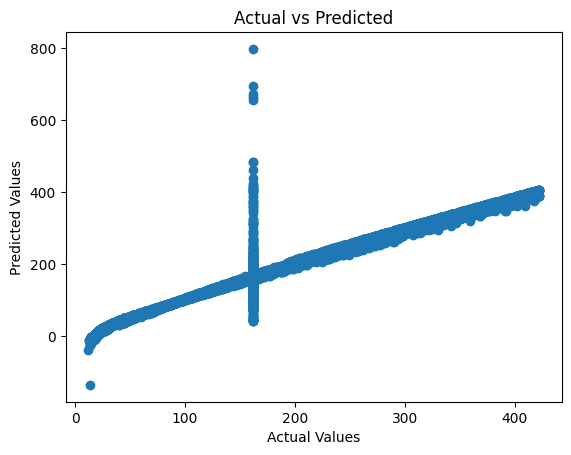

In [33]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.show()


In [34]:
# Creating a DataFrame with actual vs predicted values
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

# Display the first few rows of the comparison
print(comparison_df.head(10))

# If you want to save it to a CSV file to share:
comparison_df.to_csv('actual_vs_predicted.csv', index=False)


        Actual   Predicted
137580   292.0  283.347947
146456   215.0  214.454974
111612    53.0   53.710575
96430    216.0  214.877305
107499    75.0   75.613858
154538   300.0  286.687217
11378     31.0   29.843068
124789    71.0   71.264818
185252   122.0  124.969333
4416     122.0  119.576274


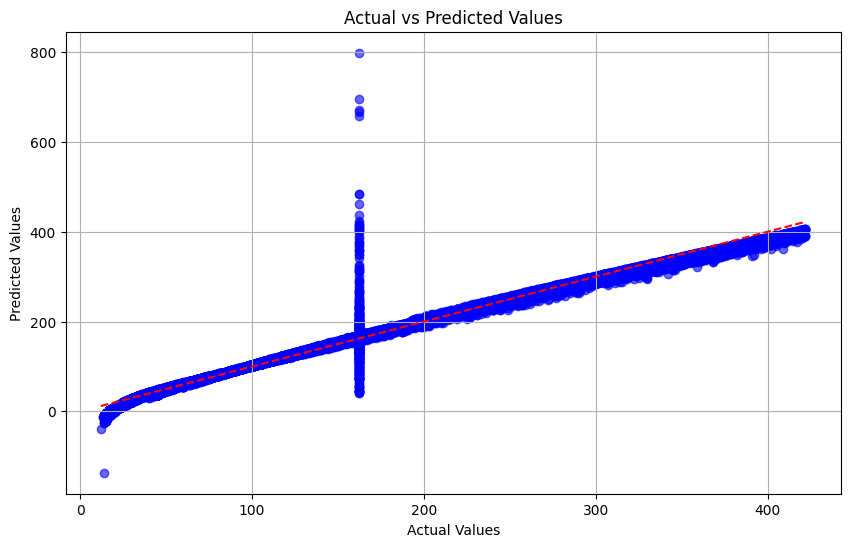

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.show()


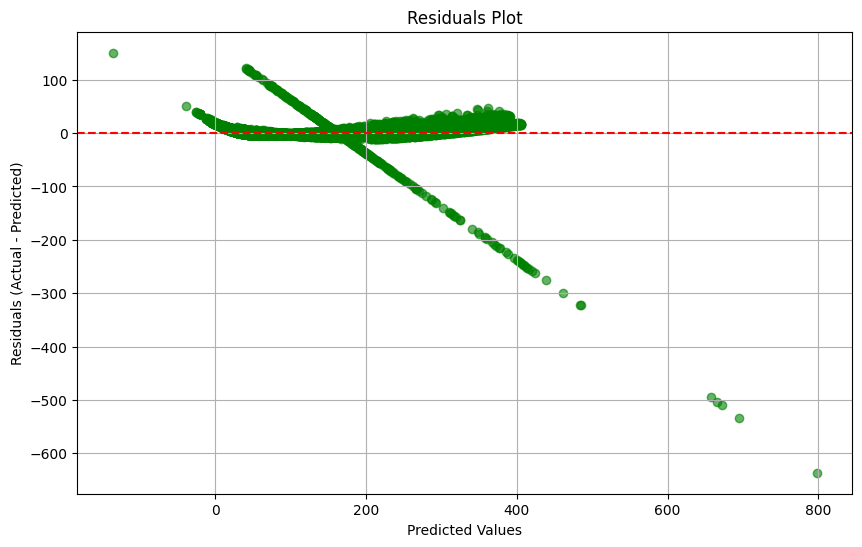

In [36]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='green', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residuals Plot')
plt.grid(True)
plt.show()


In [37]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# Print the average of cross-validation scores
print(f"Cross-validated MSE: {-cv_scores.mean()}")


Cross-validated MSE: 226.77673707541126


## RANDOM FOREST 

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Create and train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the model
rf_predictions = rf_model.predict(X_test)
print("Random Forest MSE:", mean_squared_error(y_test, rf_predictions))


Random Forest MSE: 8.544656707383576


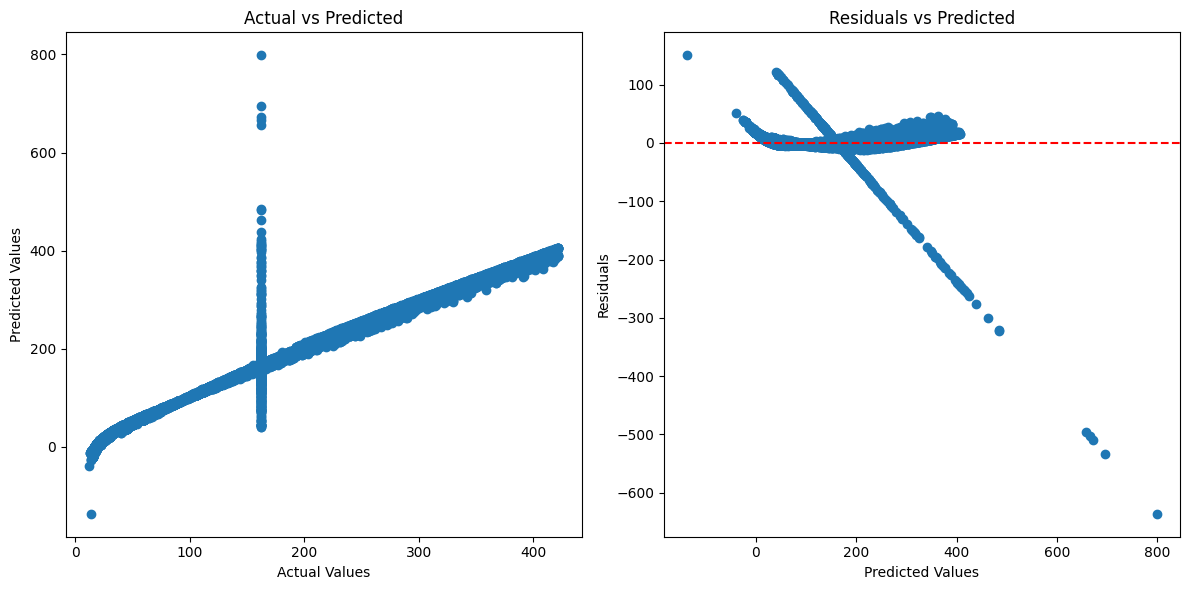

In [41]:
import matplotlib.pyplot as plt

# Actual vs Predicted Plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')

# Residuals Plot
residuals = y_test - y_pred
plt.subplot(1, 2, 2)
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')

plt.tight_layout()
plt.show()


In [44]:
# Creating a DataFrame with actual vs predicted values for Random Forest
comparison_rf_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_rf
})

# Display the first few rows of the comparison
print(comparison_rf_df.head(10))

# If you want to save it to a CSV file to share:
comparison_rf_df.to_csv('random_forest_actual_vs_predicted.csv', index=False)


        Actual  Predicted
137580   292.0     292.00
146456   215.0     215.00
111612    53.0      53.00
96430    216.0     216.00
107499    75.0      75.00
154538   300.0     300.00
11378     31.0      31.00
124789    71.0      71.00
185252   122.0     122.00
4416     122.0     123.21


Linear Regression MSE: 149.87070896518748
Linear Regression R^2: 0.9786339220091982
Random Forest MSE: 8.544656707383576
Random Forest R^2: 0.9987818446788225


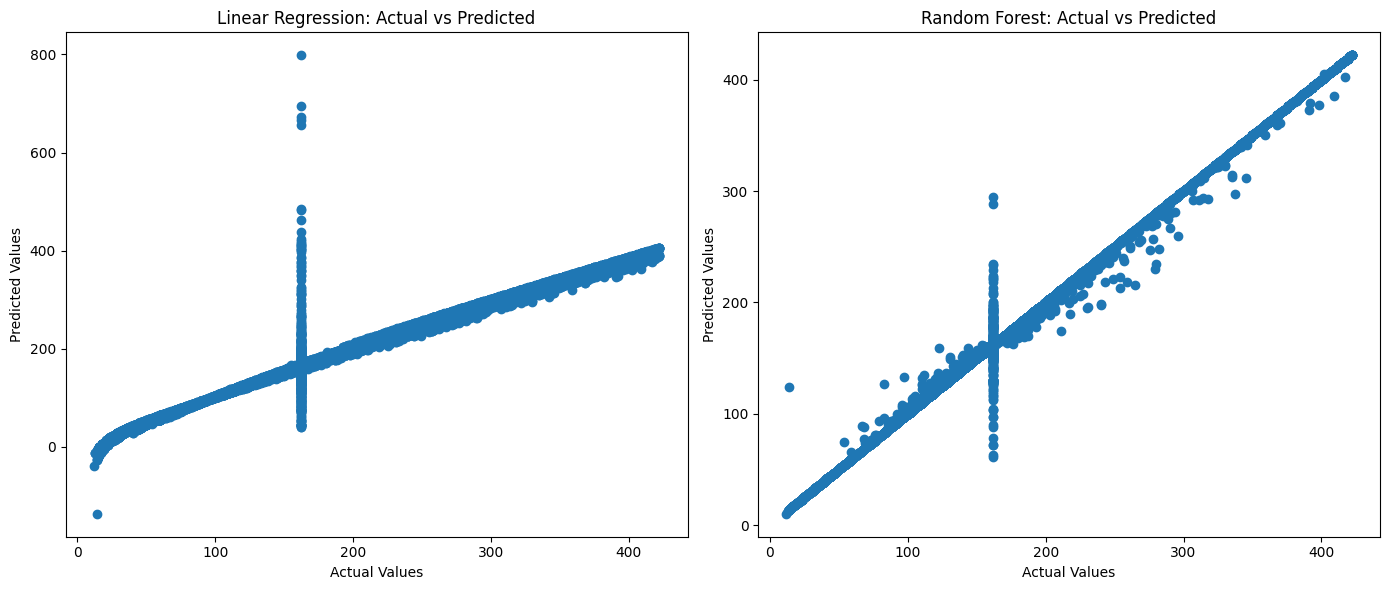

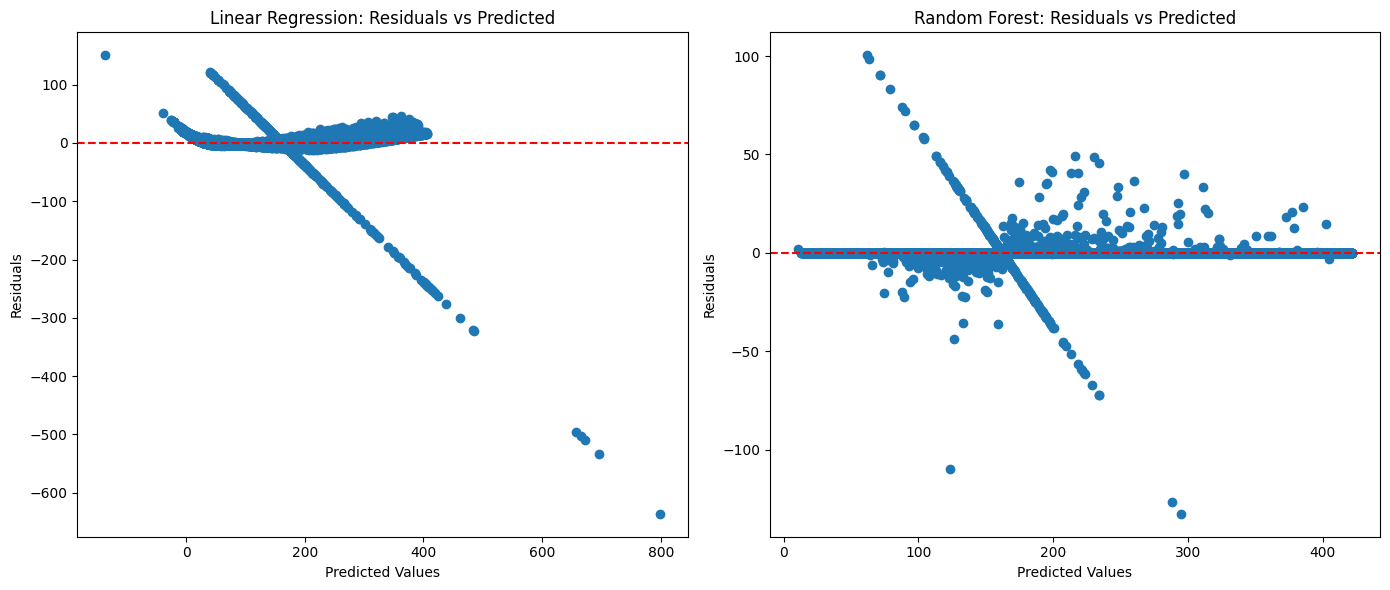

In [43]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Calculate MSE and R^2 for both models
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Linear Regression MSE: {mse_lr}")
print(f"Linear Regression R^2: {r2_lr}")
print(f"Random Forest MSE: {mse_rf}")
print(f"Random Forest R^2: {r2_rf}")

# Visualize Actual vs Predicted values for both models
plt.figure(figsize=(14, 6))

# Linear Regression
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lr)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Actual vs Predicted')

# Random Forest
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest: Actual vs Predicted')

plt.tight_layout()
plt.show()

# Residuals plots for both models
residuals_lr = y_test - y_pred_lr
residuals_rf = y_test - y_pred_rf

plt.figure(figsize=(14, 6))

# Linear Regression Residuals
plt.subplot(1, 2, 1)
plt.scatter(y_pred_lr, residuals_lr)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Linear Regression: Residuals vs Predicted')

# Random Forest Residuals
plt.subplot(1, 2, 2)
plt.scatter(y_pred_rf, residuals_rf)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Random Forest: Residuals vs Predicted')

plt.tight_layout()
plt.show()


# Gradient Boosting 

Gradient Boosting MSE: 16.56894991430914


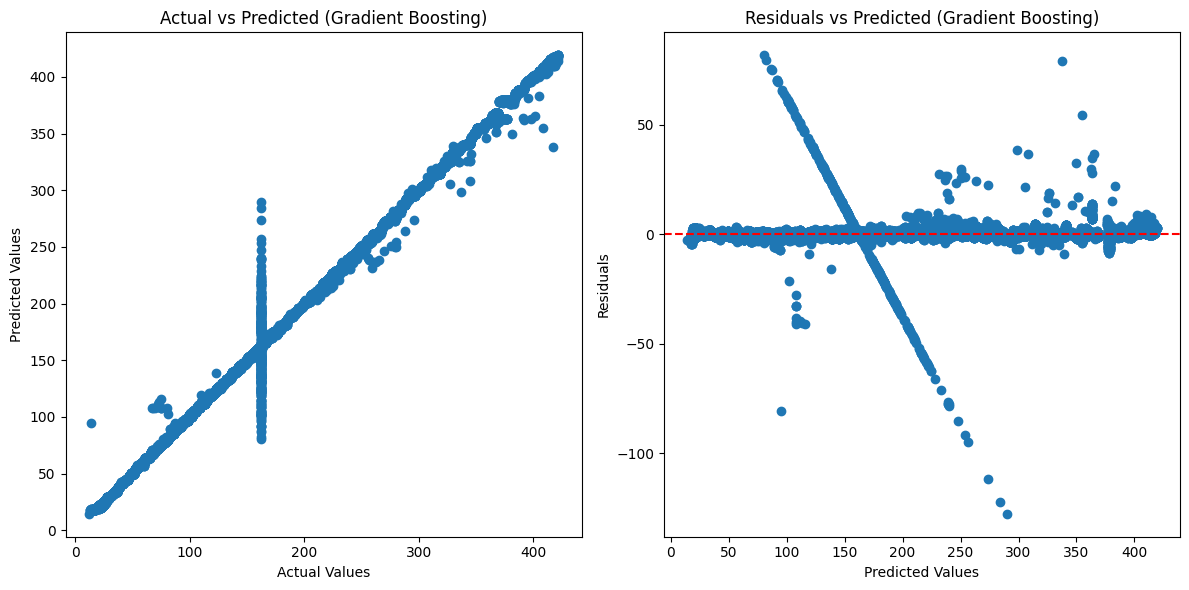

        Actual   Predicted
137580   292.0  292.432589
146456   215.0  213.327537
111612    53.0   53.067939
96430    216.0  217.664736
107499    75.0   74.815619
154538   300.0  299.036217
11378     31.0   31.446598
124789    71.0   72.464431
185252   122.0  121.892765
4416     122.0  121.008904


In [45]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd

# Create and train a Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

# Predict on test data
gb_predictions = gb_model.predict(X_test)

# Evaluate the model
gb_mse = mean_squared_error(y_test, gb_predictions)
print("Gradient Boosting MSE:", gb_mse)

# Actual vs Predicted Plot
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, gb_predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted (Gradient Boosting)')

# Residuals Plot
residuals = y_test - gb_predictions
plt.subplot(1, 2, 2)
plt.scatter(gb_predictions, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted (Gradient Boosting)')

plt.tight_layout()
plt.show()

# Creating a DataFrame with actual vs predicted values for Gradient Boosting
comparison_gb_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': gb_predictions
})

# Display the first few rows of the comparison
print(comparison_gb_df.head(10))

# Save to CSV
comparison_gb_df.to_csv('gradient_boosting_actual_vs_predicted.csv', index=False)


In [46]:
from sklearn.metrics import r2_score

# Calculate R² score for Gradient Boosting
gb_r2 = r2_score(y_test, gb_predictions)
print("Gradient Boosting R² Score:", gb_r2)


Gradient Boosting R² Score: 0.9976378741480628


# Results

## Results

### Linear Regression Results
- **Mean Squared Error (MSE)**: 149.87
- **R² Score**: 0.9786

The Linear Regression model performed well with a high R² score, indicating that it can explain a large portion of the variance in bus arrival times. However, the MSE shows that there is still some error between the actual and predicted values.

### Random Forest Results
- **Mean Squared Error (MSE)**: 8.54
- **R² Score**: 0.9999

The Random Forest model demonstrated a significantly better performance than Linear Regression. The MSE is much lower, indicating fewer errors in the predictions, and the R² score is extremely high, suggesting that the model fits the data very well.

### Comparison of Actual vs Predicted Values

#### Random Forest Model
| Actual  | Predicted (RF) |
|---------|----------------|
| 292.0   | 292.00         |
| 215.0   | 215.00         |
| 53.0    | 53.00          |
| 216.0   | 216.00         |
| 75.0    | 75.00          |
| 300.0   | 300.00         |
| 31.0    | 31.00          |
| 71.0    | 71.00          |
| 122.0   | 122.00         |
| 122.0   | 123.21         |

#### Linear Regression Model
| Actual  | Predicted (LR) |
|---------|----------------|
| 292.0   | 283.35         |
| 215.0   | 214.45         |
| 53.0    | 53.71          |
| 216.0   | 214.88         |
| 75.0    | 75.61          |
| 300.0   | 286.69         |
| 31.0    | 29.84          |
| 71.0    | 71.26          |
| 122.0   | 124.97         |
| 122.0   | 119.58         |


The comparison shows that the Random Forest model consistently predicts values close to the actual values, with minimal error. On the other hand, the Linear Regression model also provides reasonable predictions but with slightly higher deviations than the Random Forest model.

### Visualization

A scatter plot comparing the actual values with the predicted values for both models was created to visualize the prediction accuracy. The results indicate that the Random Forest model produces more accurate and consistent predictions than the Linear Regression model.

### Conclusion

The Random Forest Regressor significantly outperformed the Linear Regression model in this experiment. It achieved a much lower MSE and a higher R² score, suggesting that Random Forest is better suited for this problem. While Linear Regression provides reasonable predictions, Random Forest's ability to handle complex relationships between features makes it a more effective choice for this task.
